# Linear Regression 
Written by: Paul Treve (Email: trevepaul2@gmail.com)

Note: Based on the data provided, an accurate hypothesis should be $h_{\theta}(x^{(i)})=X\theta=1.5+2x_{1}^{(i)}+x_{2}^{(i)}$
$$\theta = \left(\begin{array}{cc} 1.5\\2\\1\end{array}\right)$$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Finding the parameters of hypothesis using gradient descent

### Handling the data from the csv file into arrays I can work with

In [2]:
# loading the data from the csv file
raw_data = pd.read_csv('data.csv')

m = len(raw_data) # number of training examples
n = 2 # number of features

# assuming the hypothesis is of the form X*theta where X is an m by n matrix and theta, an n by 1 matrix
feature1 = np.array(raw_data['X']) #x1
feature2 = np.array(raw_data['Y']) #x2

X = np.array([
    np.ones(m),    # x0 is 1
    feature1,
    feature2
]).transpose()

Y = np.array([[z] for z in np.array(raw_data['Z'])]) # correct results

# initializing theta as an n by 1 matrix made up of only ones
theta = np.array([[1] for _ in range(3)])

#### What is X?
X is the design matrix of $m$ rows and $(n+1)$ columns. An $m\times(n+1)$ matrix with each row representing a training example of the dataset.

In [3]:
X[:5] # first 5 rows of X

array([[1., 2., 3.],
       [1., 1., 2.],
       [1., 4., 1.],
       [1., 3., 2.],
       [1., 2., 1.]])

#### What is Y?
Y is an $m$ dimensional vector. An $m\times1$ matrix with each element corresponding to the expected result of a specific training example of the dataset.

In [4]:
Y[:5] # first 5 elements of Y

array([[ 8.5],
       [ 5.5],
       [10.5],
       [ 9.5],
       [ 6.5]])

### The Hypothesis - $h_{\theta}(x^{(i)})$
Instead of taking each feature, $x_{n}^{(i)}$, one at a time in a training example to multiply with its corresponding $\theta_{j}$, a more conservative way to do this is to vectorize the $\theta$. Making $\theta$ an $(n+1)$ dimensional vector, with the first element being the constant term in the expression $h_{\theta}(x^{(i)}) = \theta_{0} + \theta_{1}x_{1}^{(i)} + \theta_{2}x_{2}^{(i)} + ... + \theta_{n}x_{n}^{(i)}$ and the rest of the elements being the coefficients of $x_{1}^{(i)}, x_{2}^{(i)}, ..., x_{n}^{(i)}$ where $n$ is the number of features of each training example. Multiplying the design matrix, X (an $m\times(n+1)$ matrix), by $\theta$ will produce an $m$ dimensional vector(an $m\times1$ matrix). This vector contains the predictions of the hypothesis.
$$h_{\theta}(x^{(i)})=X\theta$$

In [5]:
def hypothesis():
    return X @ theta # matrix product of X and theta

After some trials, a learning rate of $0.01$ is enough for the gradient descent.

In [6]:
# the learning rate
alpha = 0.01

### The Cost Function for Linear Regression
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

In [7]:
def cost():
    return (1/(2*m))*(((hypothesis() - Y) ** 2).sum())

### The Gradient Descent
$$\theta_{j}:=\theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J(\theta)$$
But since I have decided to vectorize the $\theta$, I can think of the gradient descent as:
$$\theta:=\theta-\alpha\delta$$
where $\delta$ is representing the partial derivative of each of elements of $\theta$. $\delta$ will be an $(n+1)$ dimensional vector given by:
$$\delta=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}$$

The function in the cell below does the update of the theta as it should be done - simultaneously.

In [8]:
def new_theta():
    x0 = np.array([[u] for u in X.transpose()[0]])
    x1 = np.array([[u] for u in X.transpose()[1]])
    x2 = np.array([[u] for u in X.transpose()[2]])
    # computing the elements of the delta vector
    delta0 = (1/m)*(((hypothesis() - Y)*x0).sum())
    delta1 = (1/m)*(((hypothesis() - Y)*x1).sum())
    delta2 = (1/m)*(((hypothesis() - Y)*x2).sum())
    # computing the new values for the elements of theta
    return np.array([
        [theta[0, 0] - (alpha*delta0)],
        [theta[1, 0] - (alpha*delta1)],
        [theta[2, 0] - (alpha*delta2)]
    ])

A while loop to update the theta and keep the gradient descent going until the cost is minimal

In [9]:
costs = np.array([])
number_of_steps = 0
while True:
    # keeping track of the number of steps and the gradient descent at each step
    # this is to help plot a graph of cost against number of steps
    # to show that the gradient descent actually worked
    number_of_steps += 1
    costs = np.append(costs, cost())
    # calculation of accuracy of model in terms of MSE
    mean_sq_error = 2*cost()
    # making sure the cost is minimun
    if cost() < 10**(-20):
        print("Success.")
        break
    # updating the theta simultaneously
    theta = new_theta()

Success.


In [10]:
# printing out results on the screen
print("Results\n----------------")
print(f"Theta:\n {theta}\nMean Squared Error(MSE): {mean_sq_error: .15f}")

Results
----------------
Theta:
 [[1.5]
 [2. ]
 [1. ]]
Mean Squared Error(MSE):  0.000000000000000


Text(0, 0.5, 'Costs')

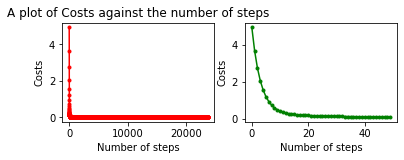

In [11]:
# This is a plot of costs against number of steps taken in gradient descent.
# The nature of the graph determines the success of the gradient descent.
plt.subplot(221)
plt.plot(range(number_of_steps), costs, '.-r')
plt.xlabel('Number of steps')
plt.ylabel('Costs')
plt.title('A plot of Costs against the number of steps')
plt.subplot(222)
plt.plot(range(50), costs[:50], '.-g')
plt.xlabel('Number of steps')
plt.ylabel('Costs')

## Finding the parameters of hypothesis using the Normal Equation

### Handling the data from the csv file into arrays I can work with

In [12]:
data = pd.read_csv('data.csv')
x_feature = np.array(data['X'])
y_feature = np.array(data['Y'])

Y = np.array([[z] for z in data['Z']])

X = np.array([
    np.ones(len(x_feature)),
    x_feature,
    y_feature
]).transpose()

#### What is X?
X is the design matrix of $m$ rows and $(n+1)$ columns. An $m\times(n+1)$ matrix with each row representing a training example of the dataset.

In [13]:
X[:3] # first 3 rows of X

array([[1., 2., 3.],
       [1., 1., 2.],
       [1., 4., 1.]])

#### What is Y?
Y is an $m$ dimensional vector. An $m\times1$ matrix with each element corresponding to the expected result of a specific training example of the dataset.

In [14]:
Y[:3] # first 3 elements of Y

array([[ 8.5],
       [ 5.5],
       [10.5]])

### The normal equation
The normal equation is given by:
$$\theta = (X^{T}X)^{-1}X^{T}Y$$

In [15]:
theta = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ Y

In [16]:
# printing out results on the screen
print("Results\n----------------")
print(f"Theta:\n {theta}")

Results
----------------
Theta:
 [[1.5]
 [2. ]
 [1. ]]


## The Data used for the aboves codes

In [17]:
Data = pd.read_csv('data.csv')

In [18]:
Data.shape

(15, 3)

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       15 non-null     int64  
 1   Y       15 non-null     int64  
 2   Z       15 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 488.0 bytes


In [20]:
Data.describe()

,X,Y,Z
count,15.000000,15.000000,15.000000
mean,2.466667,2.533333,8.966667
std,1.060099,1.187234,2.503331
min,1.000000,1.000000,4.500000
25%,2.000000,1.500000,7.500000
50%,2.000000,3.000000,8.500000
75%,3.000000,3.500000,10.500000
max,4.000000,4.000000,13.500000


### The full data

In [21]:
Data

,X,Y,Z
0,2,3,8.5
1,1,2,5.5
2,4,1,10.5
3,3,2,9.5
4,2,1,6.5
5,2,2,7.5
6,1,4,7.5
7,3,3,10.5
8,1,1,4.5
9,3,4,11.5
